## Autism Spectrum Disorder Detection using Deep Learning and Machine Learning Models


### Autistic Spectrum Disorder analysis on adult, child, adolesent data

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:

def process_dataset(file_path):
    # Load the dataset
    data = pd.read_csv(file_path, delimiter=',')  # Ensure correct delimiter
    print(data.info())
    print(f"Processing {file_path}...")
    print(data.columns)
    print(data.head())
    print('Checking for Null values')
    print(data.isnull().sum())
    print()
    
    # Data Preprocessing
    data.replace('?', np.nan, inplace=True)
    data=data.drop(['age_desc'],axis=1)
    # Convert numeric columns to float
    score_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
                     'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score',
                     'A9_Score', 'A10_Score', 'age']
    data[score_columns] = data[score_columns].astype(float)
    
    data['ethnicity'].fillna("Others", inplace=True)
    data['relation'].fillna("Not Mentioned", inplace=True)
    data.columns = data.columns.str.strip()

    # Encoding categorical variables
    label_encoders = {}
    for column in ['gender', 'ethnicity', 'contry_of_res', 'relation',  'Class/ASD', 'jundice', 'austim', 'used_app_before']:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
        label_encoders[column] = le

    

    # Impute missing values for numeric columns using mean imputation
    imputer = SimpleImputer(strategy='mean')
    data[score_columns] = imputer.fit_transform(data[score_columns])

    print("\nData types after encoding and handling missing values:")
    print(data.dtypes)

    # Separating features and target variable
    X = data.drop(columns=['Class/ASD', 'result'])
    y = data['Class/ASD']

    # Standardizing the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    return data


### Column Description:

##### Age - Years
##### Gender - Male or Female
##### Ethnicity - List of common ethnicities 
##### Born with jaundice	 -   Boolean  (yes or no)
##### Family member with PDD-	 Boolean  (yes or no)
##### Who is completing the test	-String: Parent, self, caregiver, medical staff, clinician ,etc.
##### Country of residence 	-String
##### Used the screening app before 	- Boolean  (yes or no)
##### Screening Method Type 	- Integer (0,1,2,3) (0=toddler, 1=child, 2= adolescent, 3= adult)
##### Question 1 Answer 	- Binary (0, 1)
##### Question 2 Answer 	- Binary (0, 1)
##### Question 3 Answer 	- Binary (0, 1)
##### Question 4 Answer 	- Binary (0, 1)
##### Question 5 Answer 	- Binary (0, 1)
##### Question 6 Answer 	- Binary (0, 1)
##### Question 7 Answer 	- Binary (0, 1)
##### Question 8 Answer 	- Binary (0, 1)
##### Question 9 Answer 	- Binary (0, 1)
##### Question 10 Answer 	- Binary (0, 1)
##### Screening Score 	- Integer 

### Exploratory Data Analysis

In [3]:
dataset = process_dataset('autism-dataset-all.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         1100 non-null   int64  
 1   A2_Score         1100 non-null   int64  
 2   A3_Score         1100 non-null   int64  
 3   A4_Score         1100 non-null   int64  
 4   A5_Score         1100 non-null   int64  
 5   A6_Score         1100 non-null   int64  
 6   A7_Score         1100 non-null   int64  
 7   A8_Score         1100 non-null   int64  
 8   A9_Score         1100 non-null   int64  
 9   A10_Score        1100 non-null   int64  
 10  age              1094 non-null   float64
 11  gender           1100 non-null   object 
 12  ethnicity        1100 non-null   object 
 13  jundice          1100 non-null   object 
 14  austim           1100 non-null   object 
 15  contry_of_res    1100 non-null   object 
 16  used_app_before  1100 non-null   object 
 17  result        

C:\Users\syedf\AppData\Local\Temp\ipykernel_13684\3071314592.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ethnicity'].fillna("Others", inplace=True)
C:\Users\syedf\AppData\Local\Temp\ipykernel_13684\3071314592.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

<Axes: >

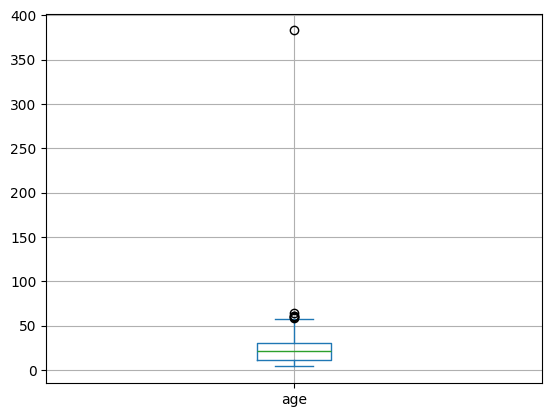

In [4]:
dataset['age'].plot.box(grid='True')

<Axes: xlabel='Class/ASD'>

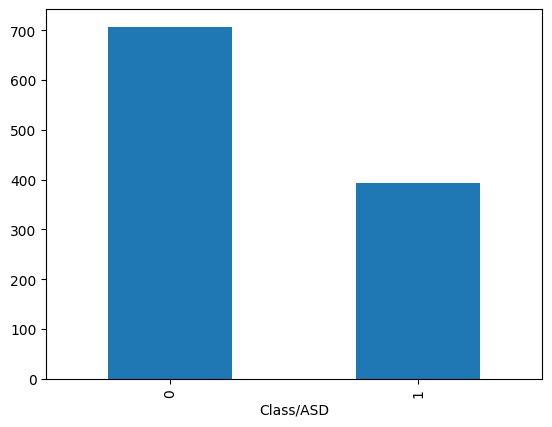

In [5]:
dataset['Class/ASD'].value_counts().plot(kind='bar')

<Axes: xlabel='contry_of_res'>

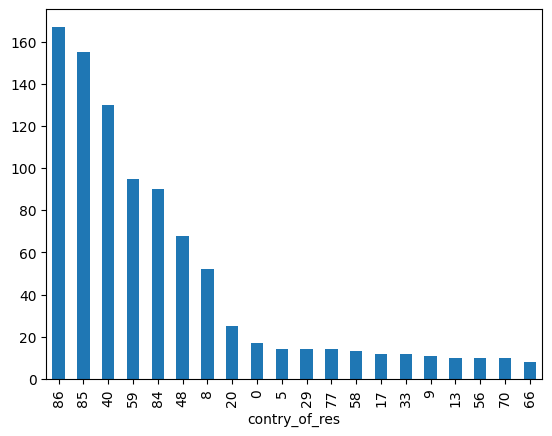

In [6]:
gk = dataset.groupby('contry_of_res').count()
gk = gk.nlargest(20,'Class/ASD')
gk['Class/ASD'].plot(kind='bar')

<Axes: >

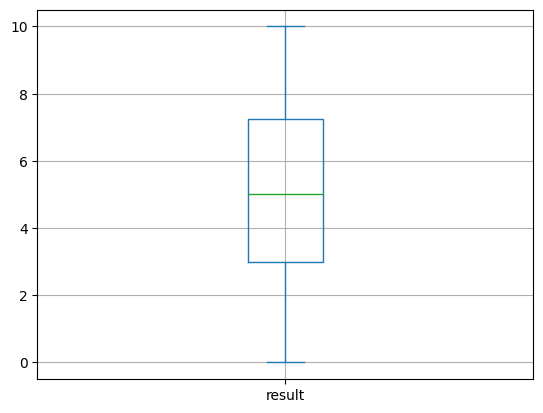

In [7]:
dataset['result'].plot.box(grid='True')

<Axes: xlabel='ethnicity'>

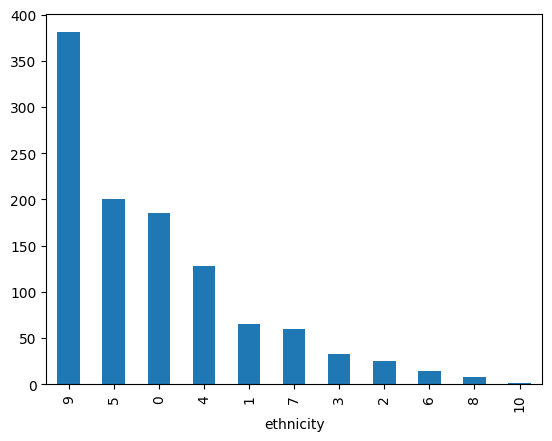

In [8]:
dataset['ethnicity'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

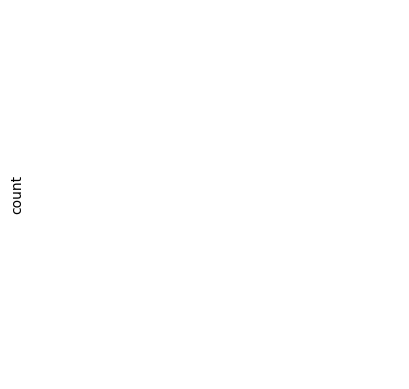

In [9]:
df1 = dataset[dataset['Class/ASD']=='YES']
df1['ethnicity'].value_counts().plot(kind='pie')

<Axes: xlabel='Class/ASD', ylabel='count'>

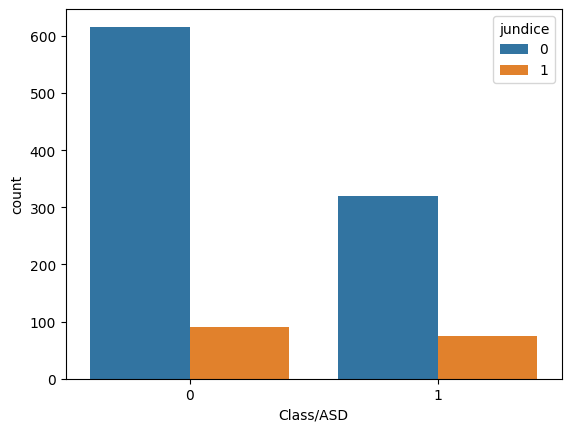

In [10]:
import seaborn as sns
sns.countplot(x="Class/ASD",hue="jundice", data=dataset)

<Axes: xlabel='austim', ylabel='count'>

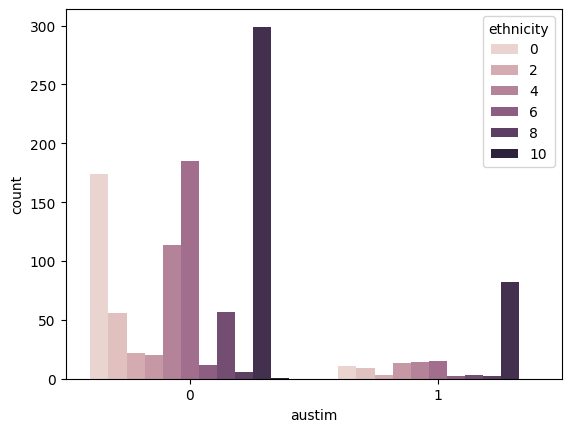

In [11]:
import seaborn as sns
sns.countplot(x="austim",hue="ethnicity", data=dataset)

#### Some of the key findings from Exploratory Data Analysis:
- Majority of the people who took the survey were from USA followed by UK,India,New Zealand,UAE and so on.
- Majority of the people who took the test are White-European ethnicity followed by Asian,Middle Eastern,black and so on.
- Person born without jaundice has high chance of being ASD positive and ASD is more common among male than female irrespective of being born with jaundice.
- Most of the white European people have ASD, followed by black, asian and so on.
- White and Europeans Ethnicities have very high chance of being ASD positive if they have it in their genes from their family. we can say confident that there is a genetic link for ASD positive.


In [12]:
dataset.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,26.0,0,9,0,0,86,0,6.0,5,0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,24.0,1,3,0,1,17,0,5.0,5,0
2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,27.0,1,3,1,1,76,0,8.0,3,1
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,35.0,0,9,0,1,86,0,6.0,5,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0,0,5,0,0,29,0,2.0,1,0


In [13]:
dataset.reset_index(drop=True,inplace=True)
dataset

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,26.0,0,9,0,0,86,0,6.0,5,0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,24.0,1,3,0,1,17,0,5.0,5,0
2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,27.0,1,3,1,1,76,0,8.0,3,1
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,35.0,0,9,0,1,86,0,6.0,5,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0,0,5,0,0,29,0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,16.0,0,4,0,0,4,1,6.0,3,0
1096,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,16.0,1,0,0,0,40,0,4.0,3,0
1097,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,0,9,0,0,85,0,8.0,5,1
1098,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,13.0,0,9,0,0,85,0,6.0,5,0


### X-Indepenent Variables
### y-Target Variable

In [14]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [15]:
len(X)

1100

### Splitting data into train and test data for training the model and testing the model

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## KNN classification 

### Scaling the data 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training the Data

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Predicting the values based on training data

In [19]:
y_pred = classifier.predict(X_test)

### Performance metrics 

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[132  14]
 [  5  69]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       146
           1       0.83      0.93      0.88        74

    accuracy                           0.91       220
   macro avg       0.90      0.92      0.91       220
weighted avg       0.92      0.91      0.91       220



### Accuracy by comparing the results of predicted values and original test values

In [21]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [22]:
acc

0.9136363636363637

## Support Vector Machines (SVM) classification

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Scaling the Data

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training the Data

In [25]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

### Predicting the values based on training data

In [26]:
y_pred = svclassifier.predict(X_test)

### Performance metrics

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[140   0]
 [  0  80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00        80

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



### Accuracy by comparing the results of predicted values and original test values

In [28]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [29]:
acc

1.0

## Random forests classification

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Scaling the Data

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training the Data

In [32]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

### Predicting the values based on training data

In [33]:
y_pred = regressor.predict(X_test)

### Performance metrics

In [34]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


### Accuracy by comparing the results of predicted values and original test values

In [35]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [36]:
acc

1.0

## Deep Learning Model

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [40]:
ann = tf.keras.models.Sequential()

In [41]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [42]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [43]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [44]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [45]:
ann.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4045 - loss: 0.8046
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6997 - loss: 0.6059
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8285 - loss: 0.4698
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3408
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8838 - loss: 0.2727
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9540 - loss: 0.1713
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9486 - loss: 0.1494
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9608 - loss: 0.1195
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9754 - loss: 0.0890
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9845 - loss: 0.0791
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9834 - loss: 0.0782
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9820 - lo

In [46]:
y_pred = ann.predict(X_test) #gives the probability in decimals
y_pred = (y_pred > 0.5) #to make it 0 or 1 where 0 means the customer wont leave


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[144   0]
 [  0  76]]


1.0

In [48]:
print(X_test)

[[ 0.6564254   1.04415578  0.89419852 ... -0.16382248  0.22935351
   0.83457589]
 [ 0.6564254   1.04415578 -1.11831989 ... -0.16382248  0.22935351
   0.83457589]
 [-1.52340235  1.04415578  0.89419852 ... -0.16382248 -0.16952216
  -0.49110422]
 ...
 [-1.52340235  1.04415578 -1.11831989 ... -0.16382248 -0.96727349
  -1.81678434]
 [ 0.6564254  -0.95771151  0.89419852 ... -0.16382248  0.62822918
  -0.49110422]
 [ 0.6564254  -0.95771151 -1.11831989 ... -0.16382248 -0.16952216
   0.83457589]]


In [64]:
ann.save('austim_all_datasets_model_trained.keras')

## PCA 

In [50]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.decomposition import PCA
# Find the 2 most important features(independent variable from the dataset)
#Start with 2 and then increase if there is poor result
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [55]:
y_pred = classifier.predict(X_test)


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[139   4]
 [  2  75]]


0.9727272727272728

C:\Users\syedf\AppData\Local\Temp\ipykernel_13684\3318974776.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


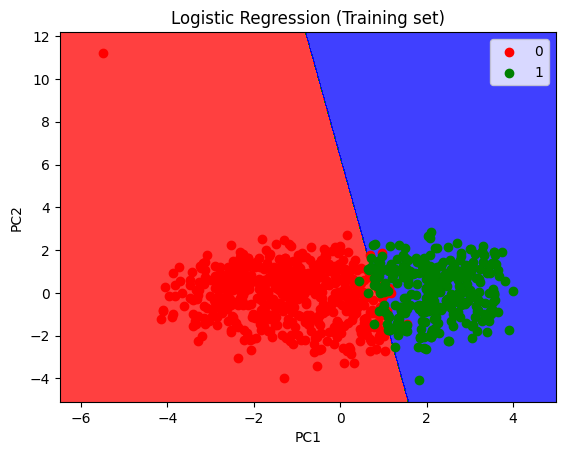

In [57]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

C:\Users\syedf\AppData\Local\Temp\ipykernel_13684\3946207957.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


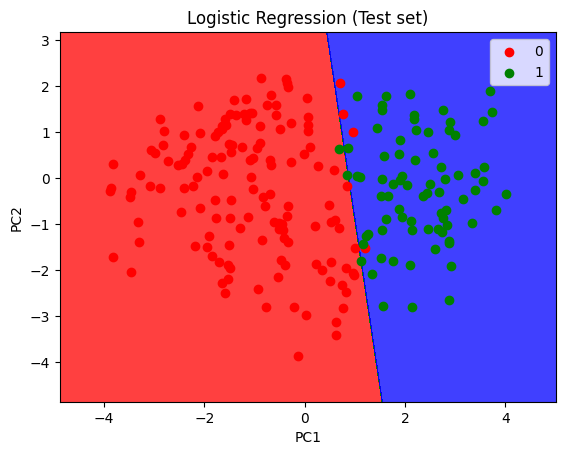

In [58]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [59]:
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,26.0,0,9,0,0,86,0,6.0,5,0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,24.0,1,3,0,1,17,0,5.0,5,0
2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,27.0,1,3,1,1,76,0,8.0,3,1
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,35.0,0,9,0,1,86,0,6.0,5,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0,0,5,0,0,29,0,2.0,1,0


In [60]:
print(X_train[0])

[ 2.57354799 -1.32966   ]


In [62]:
t = np.array(['1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '20', '1', '7', '1', '1', '18', '1', '8', '4'])
t= t.reshape(1,-1)
t = scaler.transform(t)


In [63]:
ann.predict(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0.9999995]], dtype=float32)